In [63]:
import tensorflow as tf
import numpy as np
import sys
sys.path.append('../')
import utils.preprocess as preprocess

In [64]:
pre = preprocess.preprocess("D:/DataSet/CICIDS2017/CSV/Wednesday-workingHours.pcap_ISCX.csv", labelColumnName='Label')
X_train, X_test, y_train, y_test = pre.preprocessing()

In [65]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [73]:
import utils.network.network5 as model
from utils.metrics import metric

In [74]:
net = model.MyLstmModel()

In [75]:
algorithm = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, momentum=0.89, epsilon=1e-07, centered=False, name='RMSprop')
net.compile(optimizer=algorithm, loss='categorical_crossentropy', metrics=metric())

In [76]:
from tensorflow.keras import callbacks
import datetime
dir_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S-network5-RMSprop")
logdir = os.path.join("../tensorboard", dir_name)
tensorboard_callback = callbacks.TensorBoard(logdir, histogram_freq=1)
# lrate = callbacks.LearningRateScheduler(opt_.exp_decay)

In [77]:
import numpy as np
model_ = net.fit(X_train, y_train, epochs=60, batch_size=512, validation_split=0.3, callbacks=[tensorboard_callback], verbose=1) # lrate

: 9.9374e-05 - tp: 331465.0000 - fp: 11972.0000 - tn: 665604.0000 - fn: 7323.0000 - categorical_accuracy: 0.9729 - categorical_crossentropy: 0.0687 - precision: 0.9651 - recall: 0.9784 - auc: 0.9979 - val_loss: 0.0613 - val_acc: 0.0000e+00 - val_tp: 142191.0000 - val_fp: 4117.0000 - val_tn: 286275.0000 - val_fn: 3005.0000 - val_categorical_accuracy: 0.9727 - val_categorical_crossentropy: 0.0613 - val_precision: 0.9719 - val_recall: 0.9793 - val_auc: 0.9988
Epoch 5/40
662/662 [==============================] - 11s 17ms/step - loss: 0.0649 - acc: 0.0013 - tp: 331769.0000 - fp: 11119.0000 - tn: 666457.0000 - fn: 7019.0000 - categorical_accuracy: 0.9745 - categorical_crossentropy: 0.0649 - precision: 0.9676 - recall: 0.9793 - auc: 0.9981 - val_loss: 0.0635 - val_acc: 0.0000e+00 - val_tp: 142956.0000 - val_fp: 8299.0000 - val_tn: 282093.0000 - val_fn: 2240.0000 - val_categorical_accuracy: 0.9683 - val_categorical_crossentropy: 0.0635 - val_precision: 0.9451 - val_recall: 0.9846 - val_auc: 0

In [78]:
from utils.evl_metrics import confusion_matrix, eva_metric
y_pred = net.predict(X_test)
y_class = np.argmax(y_pred, axis=1)
y_label = np.argmax(y_test, axis=1)
confusion_matrix(y_label, y_class)
eva_metric(y_label, y_class)


TrueNegatives result:  130454.0
TruePositives result:  68163.0
FalseNegatives result:  7618.0
FalsePositives result:  1187.0
Recall result:  0.8994735
Precision result:  0.98288393


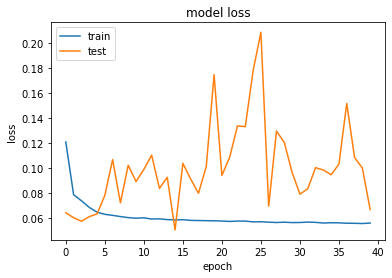

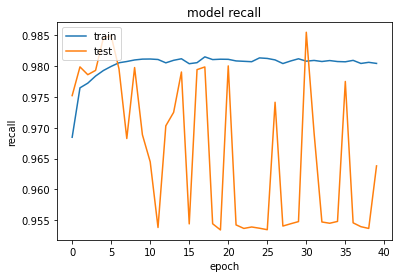

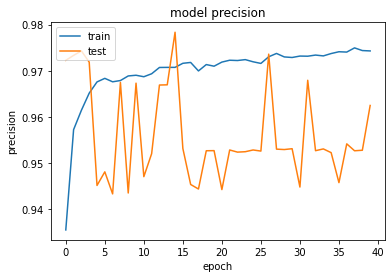

In [79]:
import utils.graph as fig
fig.add_dir(dir_name)
fig.loss_graph(model_,dir_name)
fig.recall_graph(model_,dir_name)
fig.precision_graph(model_,dir_name)